In [1]:
%matplotlib inline
import sys
sys.path.append("..") # Adds the module to path

# deeptrack.sequences

This example introduces the module deeptrack.sequences.

## 1. What is a sequence?

Sequences are lists of images, where any image in the series may depend on previous images. They can be used to create videos. They can also be used to resolve the same feature-set several times, changing only a subset of the properties of the features; an example would be imaging a sample at several focal planes.

To resolve a sequence, you create an instance of the feature `Sequence`, with the feature you want to resolve as the first input, and `sequence_length` as a second input. 

By default, properties remain constant in a series. This means that each step in the sequence is by default the same.

To make the properties change, you should call the function `Sequential` with the feature you want to change during the sequence as the first input, and a set of functions as keyword arguments. These functions will be converted to instances of `SequentialProperty`, which behave similarly to regular properties. For more information about how sequential properties work, see [properties_example.ipynb](properties_example.ipynb).

## 2. Setup

In [2]:
import numpy as np

from deeptrack.optics import Fluorescence
from deeptrack.scatterers import Ellipse
from deeptrack.sequences import Sequential, Sequence


## 3. Example - A rotating ellipse

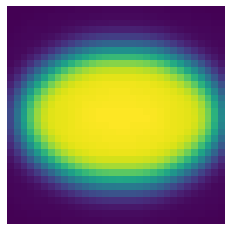

In [3]:
optics = Fluorescence(
    NA=0.6,
    magnification=10,
    resolution=1e-6,
    wavelength=633e-9,
    output_region=(0, 0, 32, 32),
)

ellipse = Ellipse(
    position_unit="pixel",
    position=(16, 16),
    intensity=1,
    radius=(1.5e-6, 1e-6),
    rotation=0, # This will be the value at time 0.
    upsample=2
)

def get_rotation(sequence_length, previous_value):
    return previous_value + 2*np.pi / sequence_length


rotating_ellipse = Sequential(ellipse, rotation=get_rotation)    

imaged_rotating_ellipse = optics(rotating_ellipse)

imaged_rotating_ellipse_sequence = Sequence(imaged_rotating_ellipse, sequence_length=50)

imaged_rotating_ellipse_sequence.plot()